In [14]:
from __future__ import division
from math import exp, sqrt, log

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

European call option price $c$ is:
$$c = e^{-rT}E[max(V-K,0)]$$
Then:
$$E[max(V-K,0)]$$
$$=\int_K^\infty (V-K)g(V)dV$$
where $g$ is the probability distribution of $V$
$$=\int_K^\infty Vg(V)dV - \int_K^\infty Kg(V)dV$$
$$=\int_0^\infty VP(V,V>K)dV - KP[V>K]$$
$$=P[V>K](\int_0^\infty V\frac{P(V,V>K)}{P[V>K]}dV - K)$$
$$=P[V>K](E[V|V>K] - K)$$
Finally:
$$c = e^{-rT}P[V>K](E[V|V>K] - K)$$
$$\Rightarrow c = \text{present value factor} * \text{probability of exercise} * (\text{expected stock price if exercised} - \text{strike price})$$
where
$$\text{present value factor} = e^{-rT}$$
$$\text{probability of exercise} = P[V>K] = N(d_2). \text{  Hull 11e. Appendix Ch.15.}$$
$$\text{expected stock price if exercised} = E[V|V>K]$$
$$\text{strike price} = K$$

To check other details check Hull 11e. Appendix of chapter 15.

In [15]:
class BlackScholes():
    """
    Black&Scholes for European options
    """
    CALL = "c"
    PUT = "p"

    # Cumulative normal distribution
    def cnd(self, X):
        return norm.cdf(X)

    # Black Sholes Function
    def compute(self, call_put_flag, S, K, t, r, s):
        """
        call_put_flag = European option type

        S = Current stock price
        K = Option striking price - price of stock for buying/selling when maturity arrives 
        t = Time until option exercise (years to maturity)
        r = Risk-free interest rate
        s = St. Deviation (volatility)

        N = Cumulative standard normal distribution
        e = Exponential term
        Ln = NaturalLog
        """
        d1 = (log(S/K) + (r + (s ** 2)/2) * t)/(s * sqrt(t))
        d2 = d1 - s * sqrt(t)

        if call_put_flag == 'c':
            # call option
            # reduced form: S * self.cnd(d1) - K * exp(-r * t) * self.cnd(d2)
            '''
            prob_exercise: 
                stock price > strike price. Check Hull 11e. Formula 15A.5
                the probability depends of the distribution of the stock price.
                i.e the probability of the stock price is higher than strike price.
            '''
            prob_exercise = self.cnd(d2)
            present_value_factor = exp(-r * t)
            '''
            expected_stock_price:
                Expected stock price in a risk-neutral world if option is exercised
            '''
            expected_stock_price = S * exp(r * t) * self.cnd(d1) / prob_exercise
            strike_price = K
            return present_value_factor * prob_exercise * (expected_stock_price - strike_price)
        elif call_put_flag == 'p':
            # put option
            return K * exp(-r * t) * self.cnd(-d2) - S * self.cnd(-d1)


In [16]:
original_strike = 50.0
original_stock_price = 49.0
original_maturity = 0.3846
original_rate = 0.05
original_volatility = 0.2

In [17]:
black_scholles = BlackScholes()
option_price_over_one_subyacent = black_scholles.compute(
    call_put_flag=BlackScholes.CALL, S=original_stock_price, K=original_strike, 
    t=original_maturity, r=original_rate, s=original_volatility)

number_subyacents = 100000
option_price = option_price_over_one_subyacent * number_subyacents
print(option_price)
# 240046.10869656666

240046.10869656614


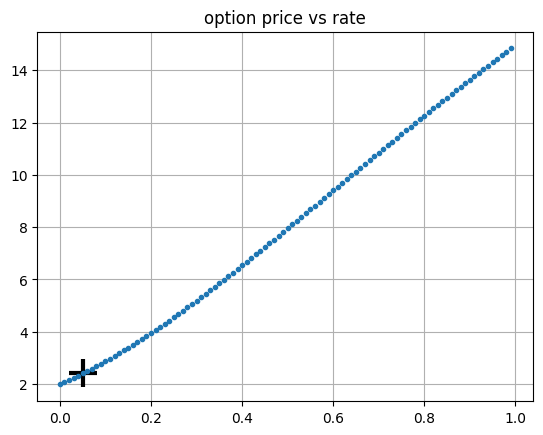

In [18]:
black_scholles = BlackScholes()
rate_list = np.arange(0, 1, 0.01)
# print(rate_list)
option_price_variable_rate = []
for rate in rate_list:
    option_price = black_scholles.compute(
        call_put_flag = BlackScholes.CALL, S=original_stock_price, K=original_strike, 
    t=original_maturity, r=rate, s=original_volatility)
    option_price_variable_rate.append(option_price)

# plt.figure(figsize=(18, 9))
plt.grid()
index_original_rate = np.where(rate_list == original_rate)[0][0]
plt.plot(original_rate, option_price_variable_rate[index_original_rate], 'k+', markersize=20, markeredgewidth=3)
plt.plot(rate_list, option_price_variable_rate, '.')
plt.title("option price vs rate")
plt.show()

/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


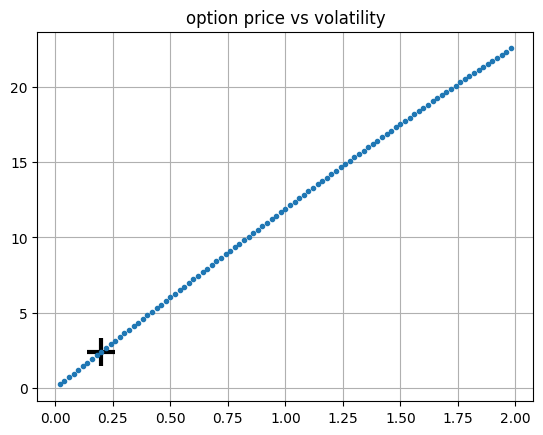

In [19]:
black_scholles = BlackScholes()
volatility_list = np.arange(0, 2, 0.02)
option_price_variable_volatility = []
for volatility in volatility_list:
    option_price = black_scholles.compute(
        call_put_flag = BlackScholes.CALL, S=original_stock_price, K=original_strike, 
    t=original_maturity, r=original_rate, s=volatility)
    option_price_variable_volatility.append(option_price)

# plt.figure(figsize=(18, 9))
plt.grid()
index_original_volatility = np.where(volatility_list == original_volatility)[0][0]
plt.plot(original_volatility, option_price_variable_volatility[index_original_volatility], 'k+', markersize=20, markeredgewidth=3)
plt.plot(volatility_list, option_price_variable_volatility, '.')
plt.title("option price vs volatility")
plt.show()

/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


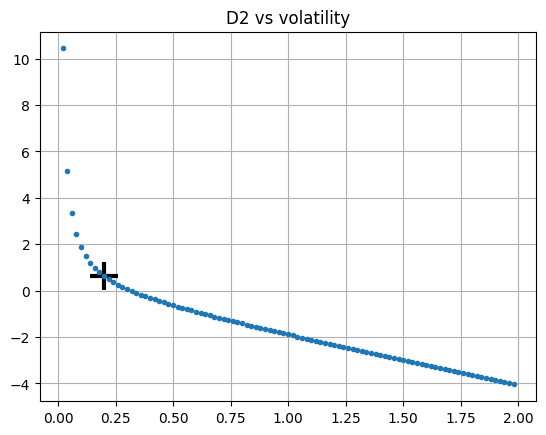

In [20]:
volatility_list = np.arange(0, 2, 0.02)
d2_variable_volatility = []
for volatility in volatility_list:
    d2 = ((original_rate - ((volatility**2) / 2))/original_maturity)/(volatility * np.sqrt(original_maturity))
    d2_variable_volatility.append(d2)

# plt.figure(figsize=(18, 9))
plt.grid()
index_original_volatility = np.where(volatility_list == original_volatility)[0][0]
plt.plot(original_volatility, d2_variable_volatility[index_original_volatility], 'k+', markersize=20, markeredgewidth=3)
plt.plot(volatility_list, d2_variable_volatility, '.')
plt.title("D2 vs volatility")
plt.show()

/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in double_scalars


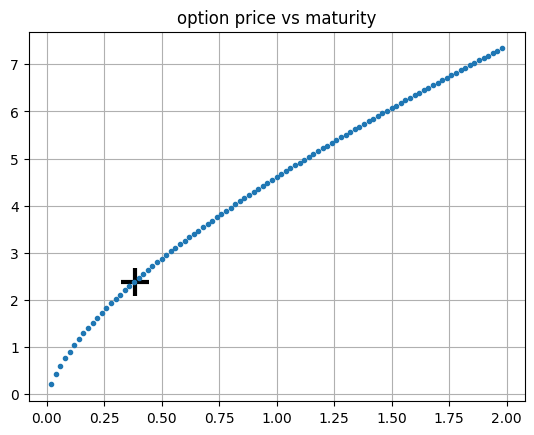

In [21]:
black_scholles = BlackScholes()
maturity_list = np.arange(0, 2, 0.02)
option_price_variable_maturity = []
for maturity in maturity_list:
    option_price = black_scholles.compute(
        call_put_flag = BlackScholes.CALL, S=original_stock_price, K=original_strike, 
    t=maturity, r=original_rate, s=original_volatility)
    option_price_variable_maturity.append(option_price)

# plt.figure(figsize=(18, 9))
plt.grid()
index_original_maturity = np.where(maturity_list == 0.38)[0][0]
plt.plot(original_maturity, option_price_variable_maturity[index_original_maturity], 'k+', markersize=20, markeredgewidth=3)
plt.plot(maturity_list, option_price_variable_maturity, '.')
plt.title("option price vs maturity")
plt.show()